In [9]:
# Lets import python first as it an important package for data processing
import pandas as pd

# This method produce lot of warning so lets import the package and ignore those worning 
import warnings 
warnings.filterwarnings("ignore")

# we need seaborn as its a Python graphing library
import seaborn as sns

#We need matplot to plot the data in for Iris dataset
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# lets load the iris data set using pandas
iris = pd.read_csv("Iris.csv") 

# This handldes the error of jyputer not plotting
%matplotlib inline

# Lets us see the first 10 entries of the file.
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [10]:
# count the cloumn Species and see how many we have in each categories
iris["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

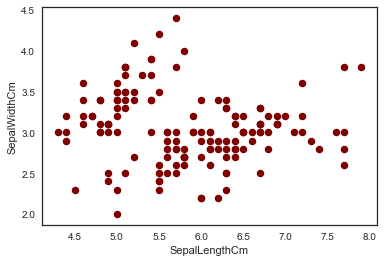

In [23]:
#plotting a scattered plot with SepalLengthCm on x-axis and SepalWidthCm on y-axis for this we will use .plot command.
#We see that we don't get much information with this graph
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm",color='#800000',linewidth=3)

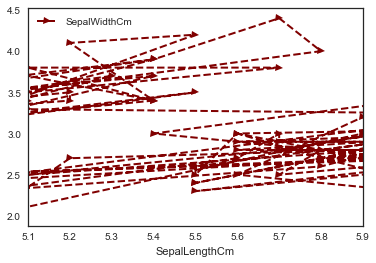

In [22]:
iris.plot(kind="line", x="SepalLengthCm", y="SepalWidthCm",color='#800000',linewidth=2,\
          linestyle='dashed',style='-->--',)

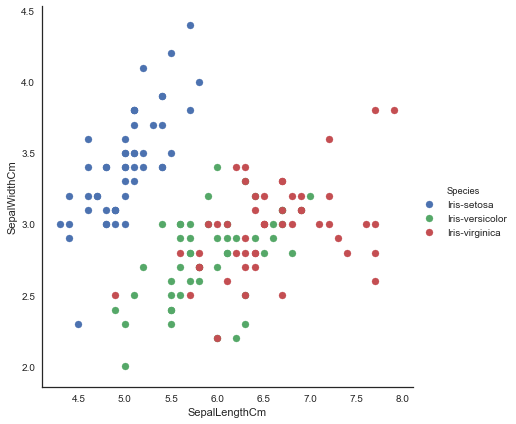

In [15]:
# We'll use seaborn's FacetGrid to color the scatterplot by species and also add the legend
# We will use \ command to move the code to next line so its readable
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

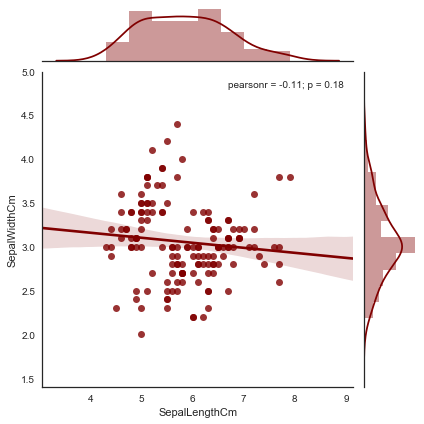

In [16]:
# we will use seaborn jointplot shows bivariate scatterplots and univariate histograms with regression 
#line density estimation in the same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=6, kind='reg', color='#800000')

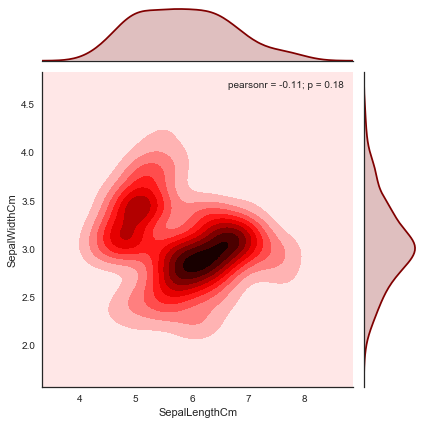

In [17]:
# we will use seaborn jointplot shows bivariate scatterplots and univariate histograms with Kernel density 
#estimation in the same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=6, kind='kde', color='#800000')

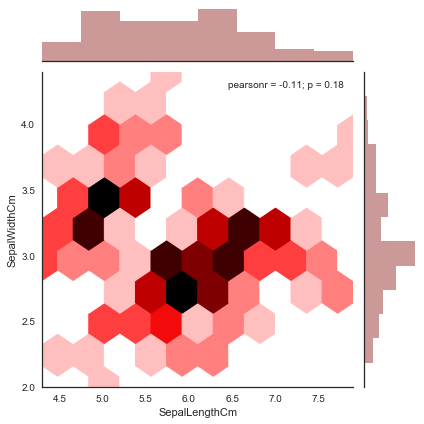

In [18]:
# we will use seaborn jointplot shows bivariate scatterplots and univariate histograms with hex graph in the same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=6, kind='hex', color='#800000')

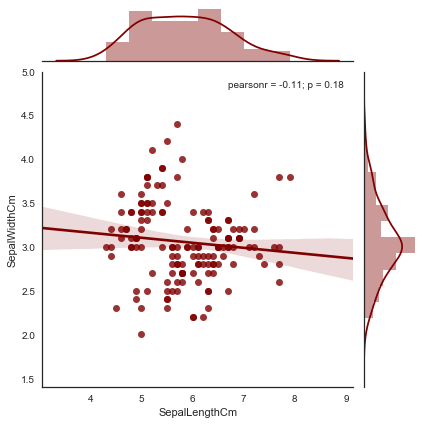

In [20]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=6, kind='reg', color='#800000')

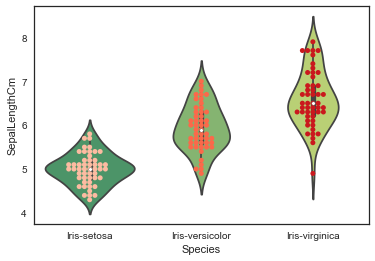

In [25]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.swarmplot(x="Species", y="SepalLengthCm", data=iris,palette='Reds')
sns.violinplot(x="Species", y="SepalLengthCm", data=iris,palette='summer')

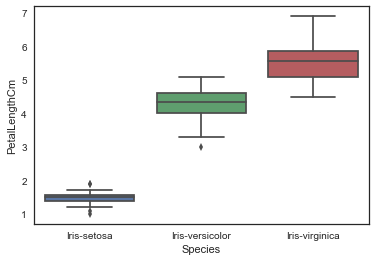

In [36]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

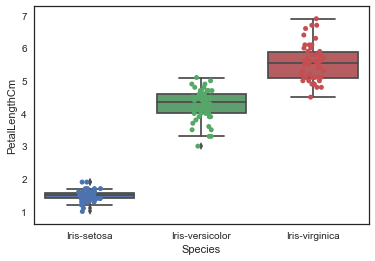

In [37]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

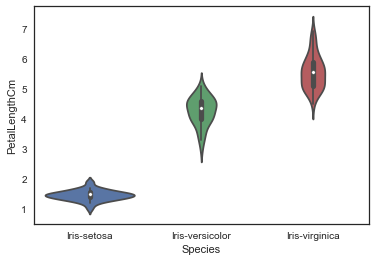

In [38]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

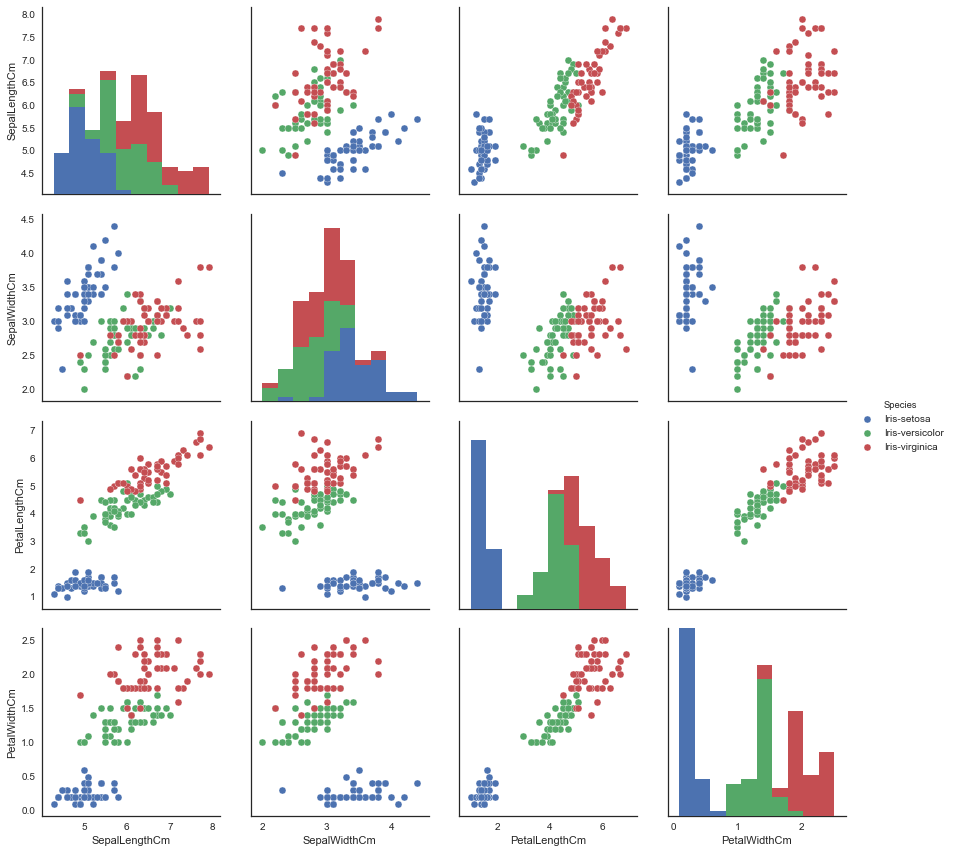

In [39]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

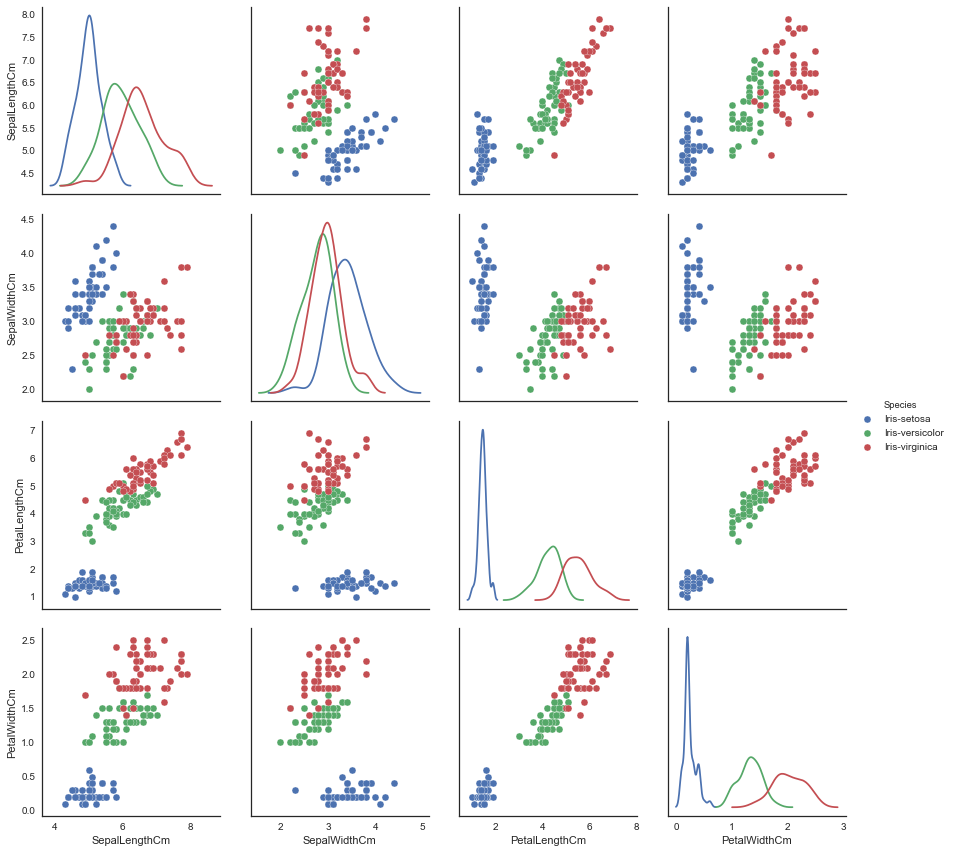

In [42]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017720AB8748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000177232AD828>]], dtype=object)

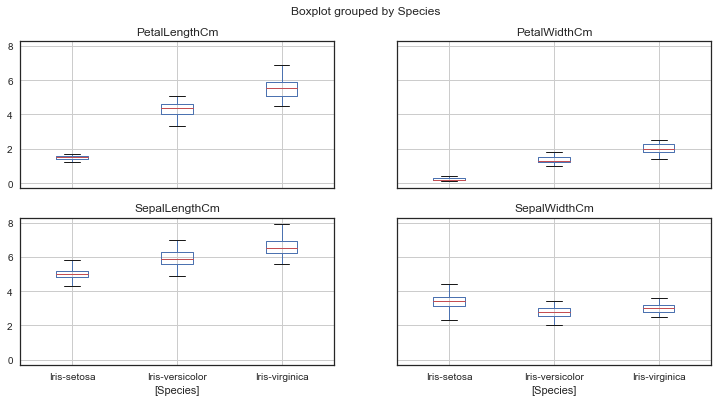

In [43]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

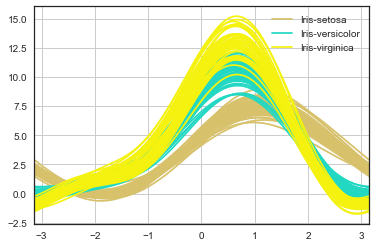

In [44]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.tools.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species", color='')

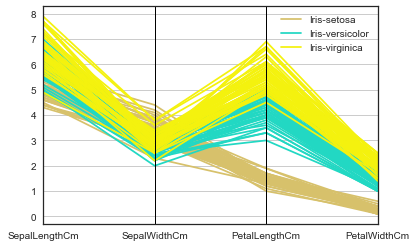

In [45]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")

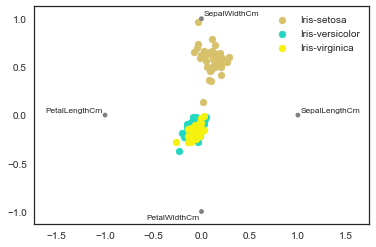

In [46]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")